In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
import joblib

In [3]:
# Load filtered and labeled dataset
df = pd.read_csv("../data/features/filtered_labeled_feature_matrix.csv")

# Separate features and target
X = df.drop(columns=["performance_class"])
y = df["performance_class"]

# Split into training and test set (ensure the test set matches the one used in training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Load the best models from hyperparameter tuning
models = {
    "Logistic Regression": joblib.load("../models/Logistic_Regression_ANOVA_06-03-2025-22-12.pkl"),
    "RF": joblib.load("../models/RF_ANOVA_06-03-2025-22-12.pkl"),
    "MLP": joblib.load("../models/MLP_ANOVA_06-03-2025-22-12.pkl"),
    "SVM": joblib.load("../models/SVM_ANOVA_06-03-2025-22-12.pkl"),
    "kNN": joblib.load("../models/kNN_ANOVA_06-03-2025-22-12.pkl"),
    "Naive Bayes": joblib.load("../models/Naive_Bayes_ANOVA_06-03-2025-22-12.pkl")
}

In [5]:
# Dictionary to store results
evaluation_results = []

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Get predictions
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs) if y_probs is not None else None
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    evaluation_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    })

    # Print evaluation results
    print(f"Accuracy: {accuracy:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

# Convert results to DataFrame and save
results_df = pd.DataFrame(evaluation_results)
results_df.to_csv("../data/results/model_evaluation_results.csv", index=False)
print("\n✅ Model evaluation results saved!")


Evaluating Logistic Regression...
Accuracy: 0.7531
ROC AUC: 0.7566
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        61
           1       0.50      0.20      0.29        20

    accuracy                           0.75        81
   macro avg       0.64      0.57      0.57        81
weighted avg       0.71      0.75      0.71        81


Evaluating RF...
Accuracy: 0.8272
ROC AUC: 0.8066
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        61
           1       0.75      0.45      0.56        20

    accuracy                           0.83        81
   macro avg       0.80      0.70      0.73        81
weighted avg       0.82      0.83      0.81        81


Evaluating MLP...
Accuracy: 0.8148
ROC AUC: 0.8467
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        61
           1       0.62      0.65      0.63        20

    accurac

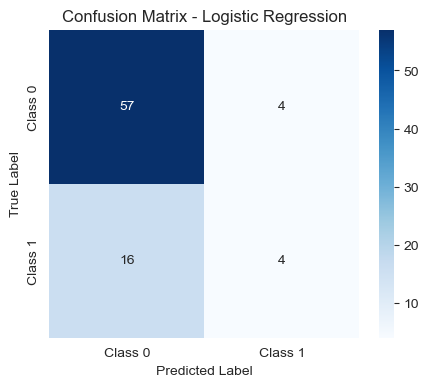

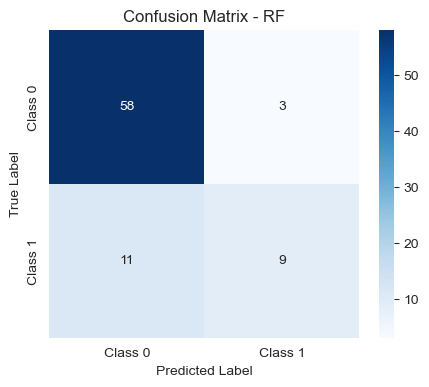

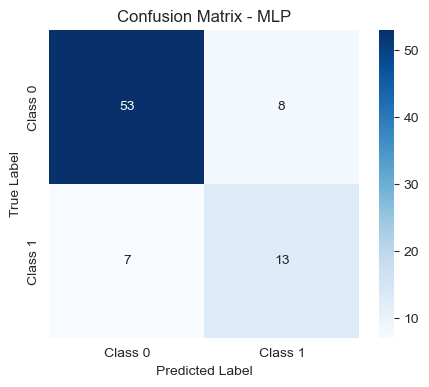

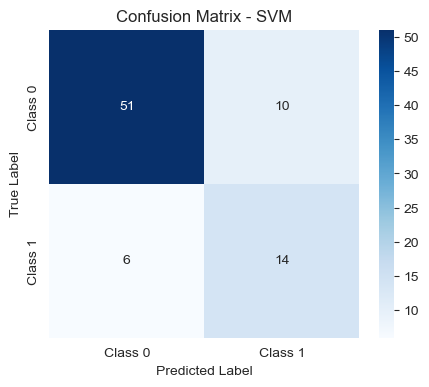

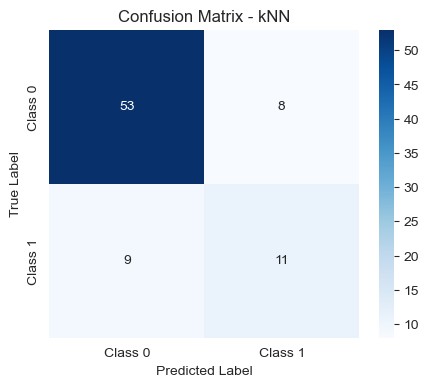

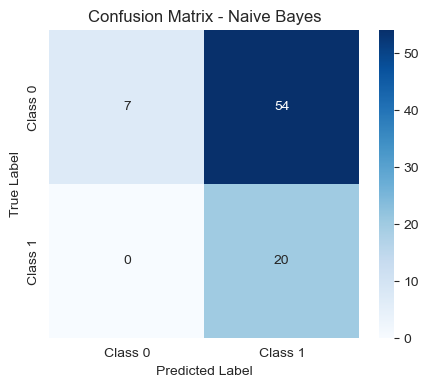

In [6]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices for all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)

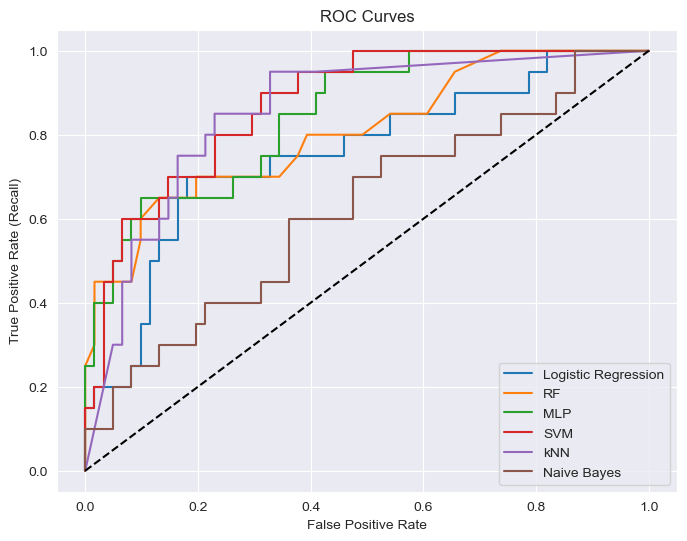

In [7]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves")
plt.legend()
plt.show()

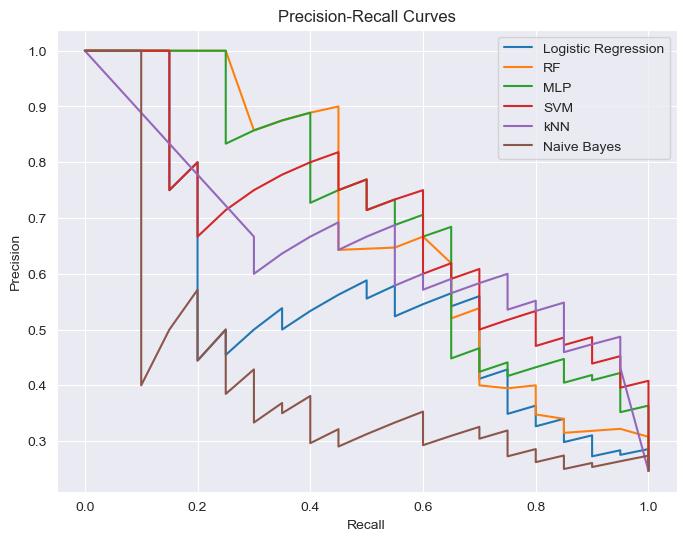

In [8]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()